In [1]:

#importing Libraries

import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing Libraries
data = pd.read_csv('/content/loan_prediction_clean_data.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.160637,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [4]:
#checking if there is any missing value

data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [5]:
#Checking data type

data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [6]:
#removing loan id since these are just the unique values
data =  data.drop('Loan_ID', axis = 1)

In [7]:
data.shape

(614, 12)

In [8]:
#separating data - independent adn dependent

#storing independent to X

X = data.drop('Loan_Status', axis = 1)

#storing the dependent var as y 

Y  = data['Loan_Status']

In [12]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.160637,0.74359,1.0,1.0
1,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0
2,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0
3,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0
4,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0


In [11]:
Y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Loan_Status, dtype: float64

In [10]:
X.shape, Y.shape

((614, 11), (614,))

Creating training and Validation set

In [9]:
#strafy will make sure that the distribution of classes is train and validation set it similar
#random state to regenerate the same train and validation set
#test size 0.2 will keep 20 data in validation and remaining 80% in train set

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,stratify=data['Loan_Status'], random_state=10, test_size=0.2)

In [13]:
#shape of training and validation set

(X_train.shape, Y_train.shape),(X_test.shape, Y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

In [14]:
#Define Archetecture Of the model

import keras
print(keras.__version__)

2.9.0


In [15]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [16]:
#importing sequential model

from keras.models import Sequential

In [17]:
#importing diff layers from keras

from keras.layers import InputLayer, Dense #output also treated as Dense


In [18]:
#number of input neurons

X_train.shape #11 features are there so we will take 11

(491, 11)

In [19]:
input_neurons =  X_train.shape[1]

In [20]:
#number of outpur neurons

#since it is binary classification(0/1) so we can take single neuron for output layer

output_neurons = 1

In [21]:
#define hidden layer neurons

number_of_hidden_layers = 2
neuron_hidden_1 = 10
neuron_hidden_2 = 5

In [22]:
#we will use activation funtions in the layers

In [23]:
#model architecture

model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units = neuron_hidden_1, activation = 'relu'))
model.add(Dense(units = neuron_hidden_2, activation = 'relu'))
model.add(Dense(units = output_neurons, activation = 'sigmoid'))

In [24]:
#summary of the model

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [26]:
# number of parameters between input and first hidden layer

input_neurons*neuron_hidden_1

110

In [27]:
# number of parameters between input and first hidden layer

# adding the bias for each neuron of first hidden layer

input_neurons*neuron_hidden_1 + 10

120

In [28]:
# number of parameters between first and second hidden layer

neuron_hidden_1*neuron_hidden_2+5 #neuron_hidden_2 = 5

55

In [29]:
# number of parameters between second hidden and output layer

neuron_hidden_2*output_neurons+1

6

**Compiling the Model**

In [30]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics = ['accuracy'])

In [31]:
#Training Model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 3s 15ms/step - loss: 0.6219 - accuracy: 0.6864 - val_loss: 0.6048 - val_accuracy: 0.6911
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5990 - accuracy: 0.6864 - val_loss: 0.5839 - val_accuracy: 0.6911
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5842 - accuracy: 0.6864 - val_loss: 0.5717 - val_accuracy: 0.6911
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5751 - accuracy: 0.6864 - val_loss: 0.5659 - val_accuracy: 0.6911
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5701 - accuracy: 0.6864 - val_loss: 0.5627 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5673 - accuracy: 0.6864 - val_loss: 0.5595 - val_accuracy: 0.6911
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5640 - accuracy: 0.6864 - val_loss: 0.5565 - val_accuracy: 0.6911
Epoch 8/50
16/16 [=

In [34]:
#Getting Predictions for the Validation Set

prediction = model.predict(X_test)
prediction = np.round(prediction).astype(int)

4/4 [==============================] - 0s 3ms/step


In [40]:
#Calculating Accuracy Score
acc= accuracy_score(Y_test,prediction)

Accuracy = acc*100
print(Accuracy)

80.48780487804879


Visualizing Model Performance

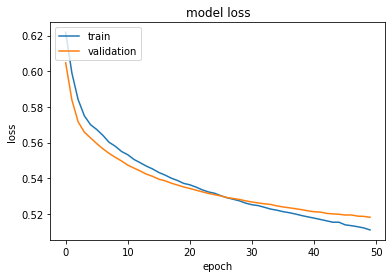

In [37]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

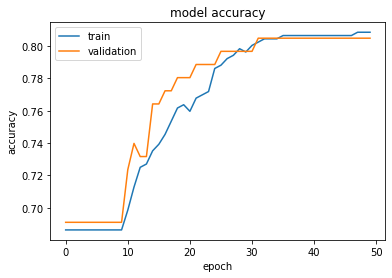

In [43]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()